# Transfer learning using InceptionV3 for image classification

## Applied in human and horse data set with accuracy up to 99,39%

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset

/content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset


## 1. Download data + Process data

In [3]:
link_train = 'https://storage.googleapis.com/learning-datasets/horse-or-human.zip'
link_validation = 'https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip'

In [4]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ea1e3a289d955daace842ef36c44fa157f3025ea20530c5f8825559f858bdc4c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [5]:
import wget

In [6]:
wget.download(link_train,out='./Train')
wget.download(link_validation,out='./Validation')

'./Validation/validation-horse-or-human.zip'

In [26]:
%cd /content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset/Train

/content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset/Train


In [27]:
!unzip -q horse-or-human.zip

In [9]:
%cd /content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset/Validation

/content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset/Validation


In [10]:
!unzip -q validation-horse-or-human.zip

In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Flatten,Conv2D,MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [28]:
train_folder_direc = '/content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset/Train'
valid_folder_direc = '/content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Dataset/Validation'

In [29]:
train_datagen = ImageDataGenerator(
                           rescale=1.0/255.0,     #Normalize values down to [0-1]
                           rotation_range=40,
                           zoom_range=0.2,        #zoom in-out 20%
                           shear_range=0.2,
                           width_shift_range=0.2, #shift 20%
                           height_shift_range=0.2,#shift 20%
                           horizontal_flip=True,  #randomly flip images
                           vertical_flip=True,
                           )

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagentor = train_datagen.flow_from_directory(train_folder_direc,
                                                     batch_size=20,
                                                     class_mode='binary',
                                                     target_size=(150,150))


validation_datagentor = validation_datagen.flow_from_directory(valid_folder_direc,
                                                     batch_size=20,
                                                     class_mode='binary',
                                                     target_size=(150,150))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## 2. Transfer Learning using InceptionV3

### Load the weights file of the Inception V3 model

In [30]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-03-29 10:31:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.141.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   171MB/s    in 0.5s    

2024-03-29 10:31:30 (171 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [31]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [32]:

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

In [33]:
# Print the mode pre summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [39]:
# Freeze all layers
for layer in pre_trained_model.layers:
    layer.trainable = False

In [40]:
# Print the mode pre summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [52]:
# Select class landmark. At the top it will be fixed, at the back it will be variable
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [53]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True


In [54]:
from tensorflow.keras.optimizers import RMSprop

In [55]:


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1,activation='sigmoid')(x)

Inception_v3_model = Model( pre_trained_model.input, x)

Inception_v3_model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics =['accuracy'])

In [61]:
print('Building model...........................')
#model fitting
callbacks =myCallback()
history = Inception_v3_model.fit(train_datagentor,
                              validation_data = validation_datagentor,
                              steps_per_epoch=50,
                              epochs=10,
                              validation_steps=10,
                              verbose=1,
                              callbacks = [callbacks])
print('Success!!!!!!!!!!!!!!!!!!!!!!')

Building model...........................
Epoch 1/10
50/50 [==============================] - 92s 2s/step - loss: 0.2072 - accuracy: 0.9321 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 2/10
50/50 [==============================] - 88s 2s/step - loss: 0.0671 - accuracy: 0.9726 - val_loss: 0.0525 - val_accuracy: 0.9800
Epoch 3/10
50/50 [==============================] - 88s 2s/step - loss: 0.0576 - accuracy: 0.9770 - val_loss: 0.0255 - val_accuracy: 0.9900
Epoch 4/10
50/50 [==============================] - 89s 2s/step - loss: 0.0265 - accuracy: 0.9900 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 86s 2s/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0372 - val_accuracy: 0.9800
Epoch 6/10
50/50 [==============================] - 89s 2s/step - loss: 0.0235 - accuracy: 0.9899 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 92s 2s/step - loss: 0.0170 - accuracy: 0.9939 - val_loss: 1.1606e-

## 3. Show result

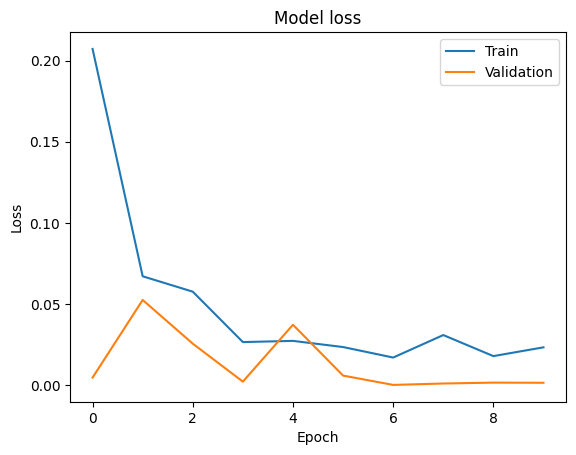

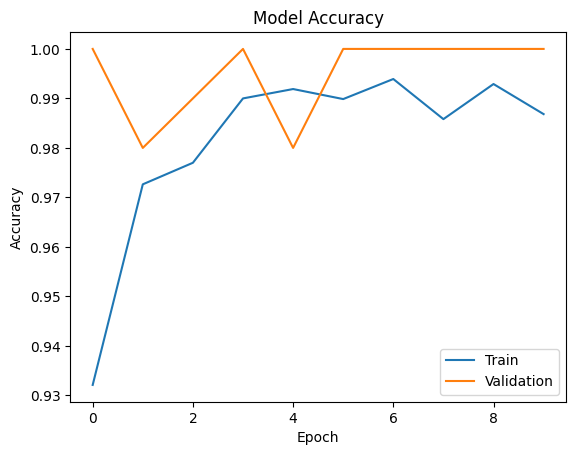

In [62]:
# Plot the loss of training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Plot the accuracy of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## 4. Save model

In [63]:
%cd /content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Model

/content/drive/MyDrive/AI_project/Transfer_Learning_Using_Inception_V3/Model


In [67]:
Inception_v3_model.save('InceptionV3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
